In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# %% Read data and preprocess

df = pd.read_csv('adult.csv',header=None)

df.iloc[0,-1]

less = df.iloc[:,-1].values == ' <=50K'

df_less, df_more = df[less], df[~less]

df_less.shape[0] + df_more.shape[0] == df.shape[0]

age_less = df_less.iloc[:,0].values
age_more = df_more.iloc[:,0].values


In [3]:
# %% Compute mean and standard deviation

mean_less = np.mean(age_less)
std_less = np.std(age_less)

mean_more = np.mean(age_more)
std_more = np.std(age_more)

In [4]:
# %% Compute histogram

hist_less, bins_less = np.histogram(age_less, bins=80, density=True)
bin_center_less = 0.5*(bins_less[1:]+bins_less[:-1])

pdf_less = stats.norm.pdf(bin_center_less, mean_less, std_less)

hist_more, bins_more = np.histogram(age_more, bins=80, density=True)
bin_center_more = 0.5*(bins_more[1:]+bins_more[:-1])

pdf_more = stats.norm.pdf(bin_center_more, mean_more, std_more)


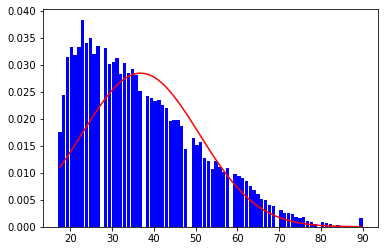

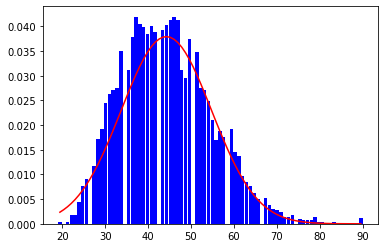

In [5]:
# %% Plot histogram and Gaussian disribution fitted to data

plt.figure(figsize=(6, 4))
plt.bar(bin_center_less, hist_less, color='blue')
plt.plot(bin_center_less, pdf_less, color='red')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(bin_center_more, hist_more, color='blue')
plt.plot(bin_center_more, pdf_more, color='red')
plt.show()